In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.stem.porter import PorterStemmer

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv.zip to IMDB Dataset.csv.zip


In [5]:
import pandas as pd

df = pd.read_csv('/content/IMDB Dataset.csv')
display(df.head())

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import zipfile
import os

zip_file_path = '/content/IMDB Dataset.csv.zip'
extraction_path = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Contents of '{zip_file_path}' extracted to '{extraction_path}':")
for item in os.listdir(extraction_path):
    print(item)

Contents of '/content/IMDB Dataset.csv.zip' extracted to '/content/':
.config
IMDB Dataset.csv
IMDB Dataset.csv.zip
sample_data


sentiment
negative    25000
positive    25000
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

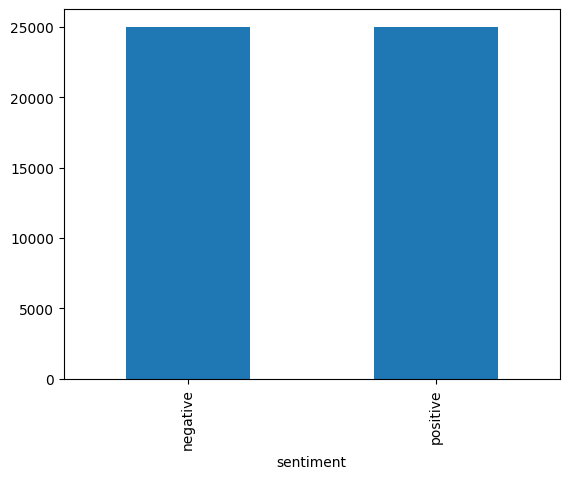

In [6]:
print(df.value_counts('sentiment'))
df.value_counts('sentiment').plot(kind='bar')

In [7]:
map_dict = {'positive':1,
           'negative':0}
df['sentiment_numeric'] = df.sentiment.map(map_dict)
df.head()

,review,sentiment,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


Preprocessing

In [8]:
ps=PorterStemmer()
corpus=set()
def preprocess(text):

  text=text.strip()  # remove unwanted space
  text=re.sub("<[^>]*>", "",text) #remove html tags
  text=re.sub('[^a-zA-Z]', ' ',text) #remove any numeric
  text=text.lower() # lower casing the word
  text=text.split()
  text=[ps.stem(word) for word in text]
  text=' '.join(text)
  return text

In [9]:
df['Preprocessed_review']=df.review.apply(preprocess)

In [10]:
df.head()

,review,sentiment,sentiment_numeric,Preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other review ha mention that after ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonder littl product the film techniqu is ve...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought thi wa a wonder way to spend time on...
3,Basically there's a family where a little boy ...,negative,0,basic there s a famili where a littl boy jake ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei s love in the time of money is a...


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Preprocessed_review,df.sentiment_numeric,
                                               test_size=0.2,random_state=42,
                                               stratify=df.sentiment_numeric)

In [12]:
X_train.shape,X_test.shape

((40000,), (10000,))

In [14]:
tf_idf=TfidfVectorizer()
X_train_tf=tf_idf.fit_transform(X_train)
X_test_tf=tf_idf.transform(X_test)

Model Creation

In [15]:
naive_bayes=MultinomialNB()
naive_bayes.fit(X_train_tf,y_train)

MultinomialNB()

In [16]:
ypred=naive_bayes.predict(X_test_tf)

In [17]:
print(metrics.classification_report(y_test,ypred,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.84      0.88      0.86      5000
    Negative       0.87      0.84      0.85      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [18]:
print('confusion matrix:')
print(metrics.confusion_matrix(y_test,ypred))

confusion matrix:
[[4399  601]
 [ 823 4177]]


Doing Test Predictions

In [19]:
X_test.values[0]

'ye mtv there realli is a way to market daria what start as a clever teenag angst comment on everyth that suck and make the viewer feel better about their sucki teenag life sitcom now mutat into a how you should deal with your problem charad i use to watch daria all the time and love it now sit here after watch the so call movi i can onli wonder what the point of thi all wa daria tell us how to lead out life in colleg excus me didn t the point daria made everi episod that what you like to do is ok as long as it is ok with yourself no matter what the rest of the sick sad world think of it thi entir thing remind me of the scene in realiti bite the movi channel show the documentri for the first time'

In [20]:
test_processed=preprocess(X_test.values[0])

In [21]:
test_input=tf_idf.transform([X_test.values[0]])

In [22]:
result=naive_bayes.predict(test_input)[0]

if result==1:
  print('Good review')
else:
  print('Bad review')

Bad review


In [23]:
y_test

,sentiment_numeric
18870,0
39791,0
30381,1
42294,0
33480,0
...,...
3634,0
47910,0
16086,0
48294,1


Testing all together

In [28]:
### Testing all together
review=['Movie is good']
test_processed=preprocess(review[0])
test_input = tf_idf.transform([test_processed])
#0= bad review
#1= good review

res=naive_bayes.predict(test_input)[0]

if res==0:
    print("Good Review")

elif res==1:
    print("Bad Review")

Good Review
